# Predicting credit card fraud using decision trees

### Aim:
- small decision tree with high precision
- Information Gain = Entropy(parent) - [Weighted average] * Entropy(child)
- tune

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

turns out the data is unbalanced, we have to process it.

# let's balance the dataset with Building a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

In [10]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [13]:
legit.shape

(284315, 31)

- fraudsters `(492, 31)`
- legit `(284315, 31)`
- legit_sample.shape `(492, 31)`

In [14]:
legit_sample = legit.sample(n=492)

In [18]:
# creating new dataframe
new_df = pd.concat([legit_sample, fraud], axis=0)

In [25]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
x, y = new_df.drop(["Class"], axis = 1), new_df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [27]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


In [28]:
print(y.shape, y_train.shape, y_test.shape)

(984,) (787,) (197,)


# Model Training

In [29]:
# Decision trees

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dtc = DecisionTreeClassifier(random_state=2)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)


# Print a classification report showing the precision, recall, and F1 score of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        99
           1       0.88      0.90      0.89        98

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197



In [63]:
# Evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[87 12]
 [10 88]]


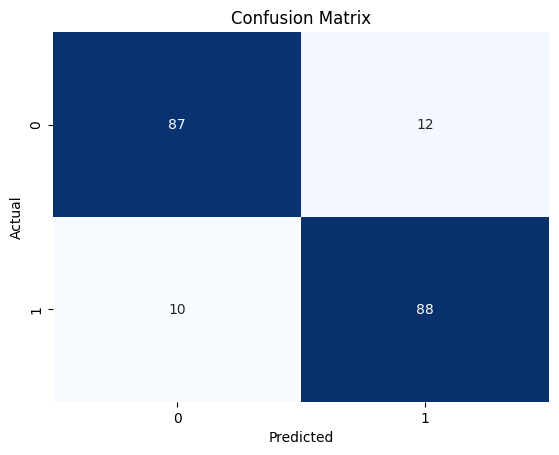

In [64]:
# to visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: A')
plt.show()

# Tuning

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

[[89 10]
 [15 83]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        99
           1       0.89      0.85      0.87        98

    accuracy                           0.87       197
   macro avg       0.87      0.87      0.87       197
weighted avg       0.87      0.87      0.87       197



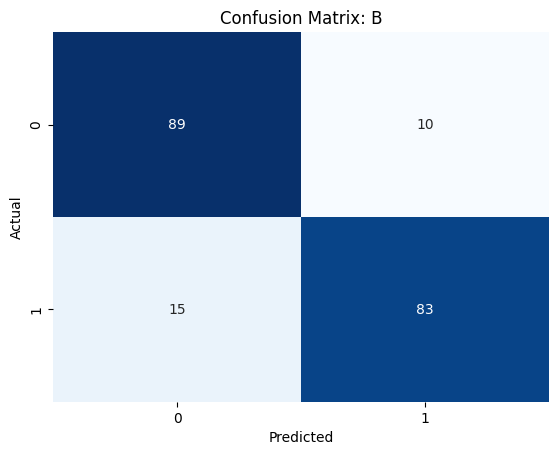

In [75]:
# Compute the mutual information scores for each feature
mutual_info = mutual_info_classif(x_train, y_train)

# Select the top 10% of features based on mutual information scores
selected_features = np.array(x.columns)[mutual_info > np.percentile(mutual_info, 90)]

# Train a decision tree classifier on the selected features
dtc = DecisionTreeClassifier(random_state=2)
dtc.fit(x_train[selected_features], y_train)
y_pred = dtc.predict(x_test[selected_features])

# Evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Print a classification report showing the precision, recall, and F1 score of the model
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: B')
plt.show()



## Analysis

- In credit card fraud detection, minimizing false positives is often more important than minimizing false negatives. This is because false positives can inconvenience customers by blocking legitimate transactions, whereas false negatives can result in fraudulent transactions going undetected.

- So, it ultimately depends on the priorities of the credit card fraud detection system. If the priority is to minimize false negatives (i.e., correctly identifying actual fraud cases), then confusion matrix A may be considered better. However, if the priority is to minimize false positives (i.e., avoiding inconvenience to customers), then confusion matrix B may be considered better.

# Demonstration of Mutual_info_classif

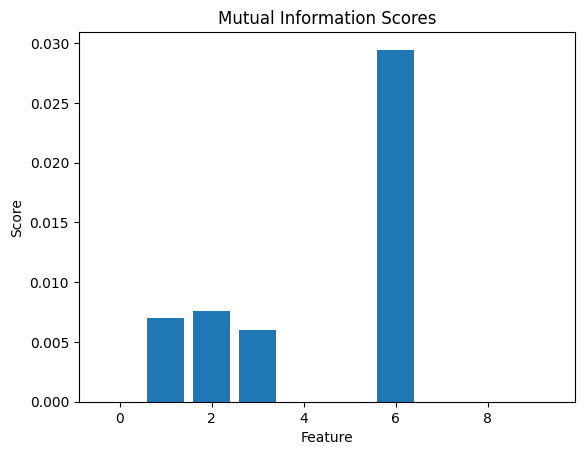

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Set random seed for reproducibility
np.random.seed(123)

# Simulate 10 independent variables (features) with 1000 samples each
x = np.random.rand(1000, 10)

# Simulate a binary target variable with 1000 samples
y = np.random.randint(0, 2, size=1000)

# Compute the mutual information scores between each feature and the target variable
mi_scores = mutual_info_classif(x, y)

# Plot the mutual information scores for each feature
plt.bar(range(len(mi_scores)), mi_scores)
plt.title("Mutual Information Scores")
plt.xlabel("Feature")
plt.ylabel("Score")
plt.show()


In [6]:
print(mi_scores)

[0.         0.00701877 0.00757332 0.00602846 0.         0.
 0.02944141 0.         0.         0.        ]
